In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
# import seaborn as sns
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
# import arrow
import matplotlib
matplotlib.style.use('ggplot')

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [3]:
dengues = glob.glob("temp/*.csv")
wrong_date_format = dengues[-1]
dengues = dengues[:-2]

In [4]:
dengues

['temp/dhf46_160530010506.csv',
 'temp/dhf47_160530010514.csv',
 'temp/dhf48_160530010521.csv',
 'temp/dhf49_130826033129.csv',
 'temp/dhf50_130826033116.csv',
 'temp/dhf51_130826033101.csv',
 'temp/dhf52_130826033050.csv',
 'temp/dhf53_130826033033.csv',
 'temp/dhf54_130826033019.csv',
 'temp/dhf55_130826032932.csv',
 'temp/dhf56_160530010401.csv',
 'temp/dhf57_160530010439.csv',
 'temp/dhf58_160530010448.csv']

In [5]:
wrong_date_df = pd.read_csv(wrong_date_format)
print len(wrong_date_df)
wrong_date_df = wrong_date_df.fillna(0)

63931


In [6]:
to_drop = wrong_date_df[wrong_date_df.sickness_start == 0].index
wrong_date_df = wrong_date_df.drop(to_drop)

## yyyy-mm-dd

In [7]:
def clean_date_format(date):
    
    str_date = str(date)
    new_date = str_date.split('/')
    
    def clean_dm(dm):
        if len(dm) == 1:
            return '0'+ dm
        else:
            return dm
        
    return new_date[2] + "-" + clean_dm(new_date[0]) + "-" + clean_dm(new_date[1])

def see_split(x):
    return str(x).split('/')

In [8]:
wrong_date_df.sickness_start = wrong_date_df.sickness_start.apply(clean_date_format)
cleaned_date_df = wrong_date_df

In [9]:
list_ = []
for file_ in dengues:
    df = pd.read_csv(file_)
    list_.append(df)
    allDengue = np.concatenate(list_)

list_.append(cleaned_date_df)
allDengue = np.concatenate(list_)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity

In [10]:
print len(allDengue[0])
print len(wrong_date_df.iloc[0])

allDengue[-1]

21
21


array([66, 2.0, 7.0, 9.0, 5.0, 1.0, 1.0, 0.0, 6.0, '93040111', 1.0, 3.0,
       1.0, 3.0, '93040100', '2016-08-22', '8/26/2016', '8/26/2016',
       '0000-00-00', 0.0, 0.0], dtype=object)

In [15]:
allDengue_copy = allDengue.copy()
allDengue_copy[:,9] = allDengue_copy[:,9].astype('str')

array(['34010001', '34010001', '34010001', ..., '86040903', '94051201',
       '93040111'], 
      dtype='|S10')

In [16]:
def seperate(data,distinct):
    tmp = []
    for distinct_province in distinct:
        sub_tmp = []
        for data_province in data:
            if data_province[9][:2] == distinct_province:
                sub_tmp.append(data_province)
        sub_tmp = np.array(sub_tmp)
        tmp.append(sub_tmp)
    return np.array(tmp)

# def plotByDate(allDates,title):
#     df = pd.DataFrame(allDates,columns=['date'])
#     df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))
#     plt.grid(True);2
#     plt.title(title)
#     plt.xlabel("Weeks")
#     plt.ylabel("Cases")
# #     plt.savefig(title+".png",dpi = 150)

# def cleanDate(raw_dates):
#     toRemove = []
#     for i,elt in enumerate(raw_dates):
#         if elt == '0000-00-00' or type(elt) == float:
#             print "to be removed", i, elt
#             toRemove.append(i)

#     raw_dates = np.delete(raw_dates, toRemove, axis=0)
#     return raw_dates

In [17]:
unique_province = [
                   '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '30', '31', '32', '33',
                   '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45',
                   '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
                   '57', '58', '60', '61', '62', '63', '64', '65', '66', '67', '70',
                   '71', '72', '73', '74', '75', '76', '77', '80', '81', '82', '83',
                   '84', '85', '86', '90', '91', '92', '93', '94', '95', '96'
                  ]
allProvinces = seperate(allDengue_copy,unique_province)

In [18]:
allProvinces_copy = allProvinces.copy()
allProvinces_copy = allProvinces_copy[:-1]

# temp = allProvinces_copy[0]
# for i in allProvinces_copy[:3]:
    
allProvinces_copy = np.concatenate(([i for i in allProvinces_copy[:]]),axis=0)

In [20]:
allProvinces_df = pd.DataFrame(allProvinces_copy)
# allProvinces_df = allProvinces_df.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20],axis=1)
allProvinces_df = allProvinces_df.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,19,20],axis=1)
allProvinces_df.columns = ['โรค', 'รหัสจังหวัด', 'date','death']
allProvinces_df['รหัสจังหวัด'] = allProvinces_df['รหัสจังหวัด'].astype('str').str[:2]
allProvinces_df = allProvinces_df.sort_values(by='date')
# allProvinces_df = allProvinces_df.drop(138990)
# allProvinces_df = allProvinces_df.drop(168347)

In [21]:
import pickle
with open('/Users/JohnnyV/Desktop/Academic/CS/DataMining/project-trial/thailand.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [22]:
allProvinces_df = allProvinces_df[allProvinces_df['รหัสจังหวัด']!='na']
provinces = ([b.get(int(i)) for i in allProvinces_df['รหัสจังหวัด']])
allProvinces_df['จังหวัด'] = provinces

In [23]:
date_df = allProvinces_df.copy()

In [24]:
date_df = date_df.drop(date_df.date.index[0])

In [25]:
date_df.date = pd.DatetimeIndex(date_df.date)
# allProvinces_date_df.index = pd.PeriodIndex(date_df.date,freq='M')
date_df.index = date_df.date

In [58]:
a = pd.DataFrame(date_df.resample('W').size())
a.columns = ['cases']
a[-53:].sum()

cases    61938
dtype: int64

In [292]:
bkkCases = allProvinces_df[allProvinces_df['จังหวัด'] == "Bangkok"]
bkkCases = bkkCases.sort_values(by='date')
bkkCases['year'] = bkkCases['date'].astype('str').str[:4]
bkkCases['monthVal'] = pd.DatetimeIndex(bkkCases['date']).month

In [293]:
# date_df[date_df['date'] == '2003-01-01']

In [294]:
a = np.array(allProvinces_df['จังหวัด'])
counts = dict()
for i in a:
    counts[i] = counts.get(i,0) + 1

import operator
max(counts.iteritems(), key=operator.itemgetter(1))

(u'Bangkok', 124665)

In [295]:
bkkCases.head()

,โรค,รหัสจังหวัด,date,จังหวัด,year,monthVal
7541,66,10,2003-01-01,Bangkok,2003,1
1138,66,10,2003-01-01,Bangkok,2003,1
397,26,10,2003-01-01,Bangkok,2003,1
1894,26,10,2003-01-01,Bangkok,2003,1
1609,26,10,2003-01-01,Bangkok,2003,1


In [296]:
bkk_temp = pd.DataFrame(bkkCases.groupby([bkkCases['year'],bkkCases['monthVal']]).size())
bkk_temp.columns = ['bkk_freq']

In [297]:
yr = [i for i in range(3,15)]
mth = [i for i in range(1,13)]

yr_tmp = []
mth_tmp = []
freq_tmp = []
for idx, iele in enumerate(yr):
    for jdx, jele in enumerate(mth):
        yr_tmp.append(iele)
        mth_tmp.append(jele)

for i in bkk_temp.bkk_freq:
    freq_tmp.append(i)
    
yr_tmp = np.array(yr_tmp)
mth_tmp = np.array(mth_tmp)
freq_tmp = np.array(freq_tmp)

bkk_df = pd.DataFrame(yr_tmp)
bkk_df['mth'] = pd.Series(mth_tmp)
bkk_df['freq'] = pd.Series(freq_tmp)
bkk_df.columns = ['yr','mth','freq']

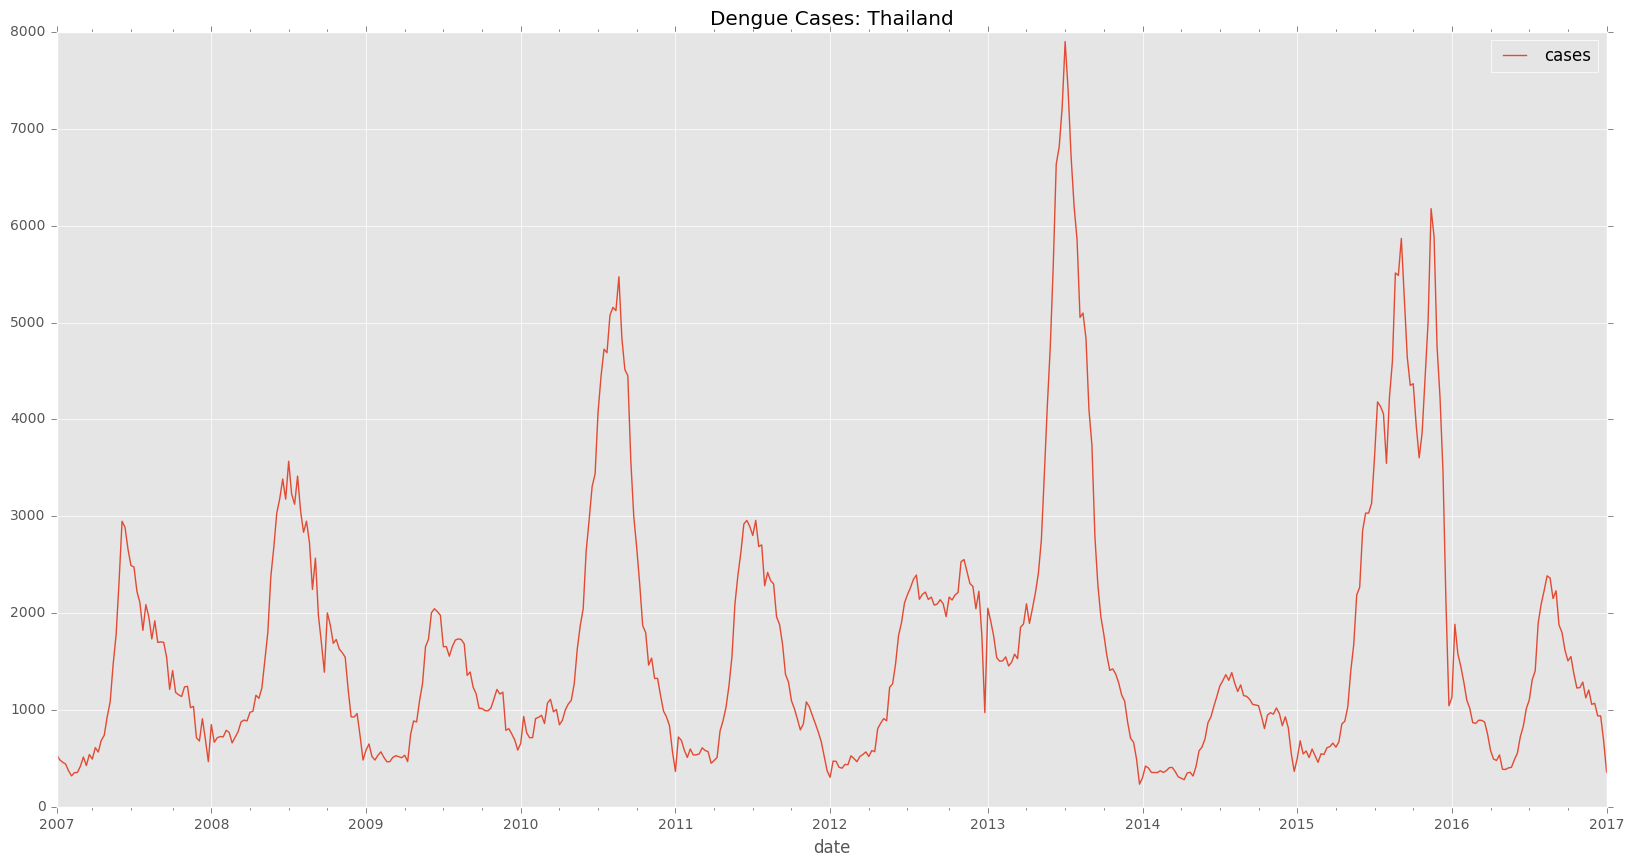

In [298]:
weekly_df = date_df.resample('W').size()
weekly_df = pd.DataFrame(weekly_df)
weekly_df = weekly_df[209:]
weekly_df.columns = ['cases']
weekly_df.cases.plot(kind='line',figsize=(20,10),label='cases')
plt.title("Dengue Cases: Thailand")
plt.legend()

In [300]:
bkk_dengues = date_df[date_df['จังหวัด'] == 'Bangkok'].resample('W').size()

In [301]:
type(bkk_dengues)

pandas.core.series.Series

In [302]:
bkk_dengues_df = pd.DataFrame(bkk_dengues)

In [303]:
bkk_dengues_df.columns = ['freq']

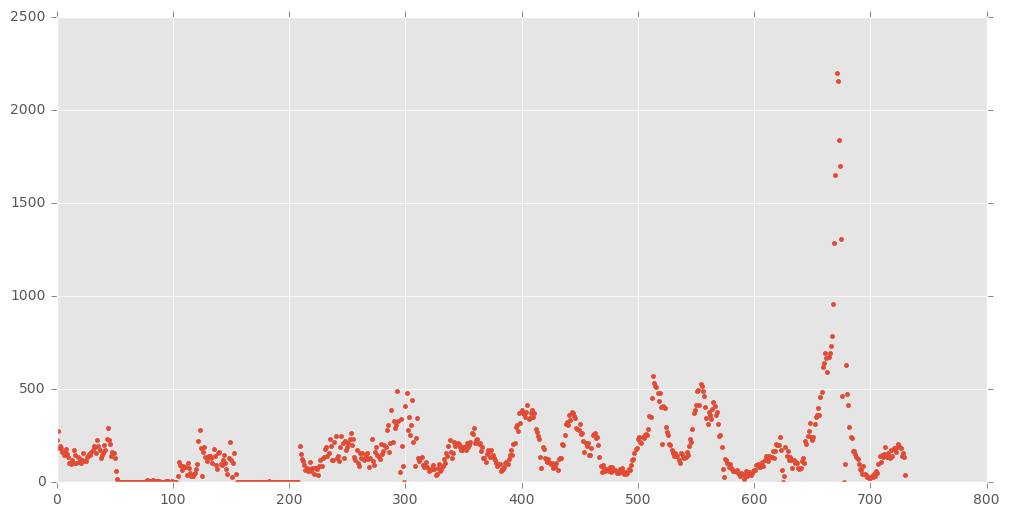

In [304]:
xs = [i for i in range(len(bkk_dengues_df))]
ys = bkk_dengues_df.freq
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'.')

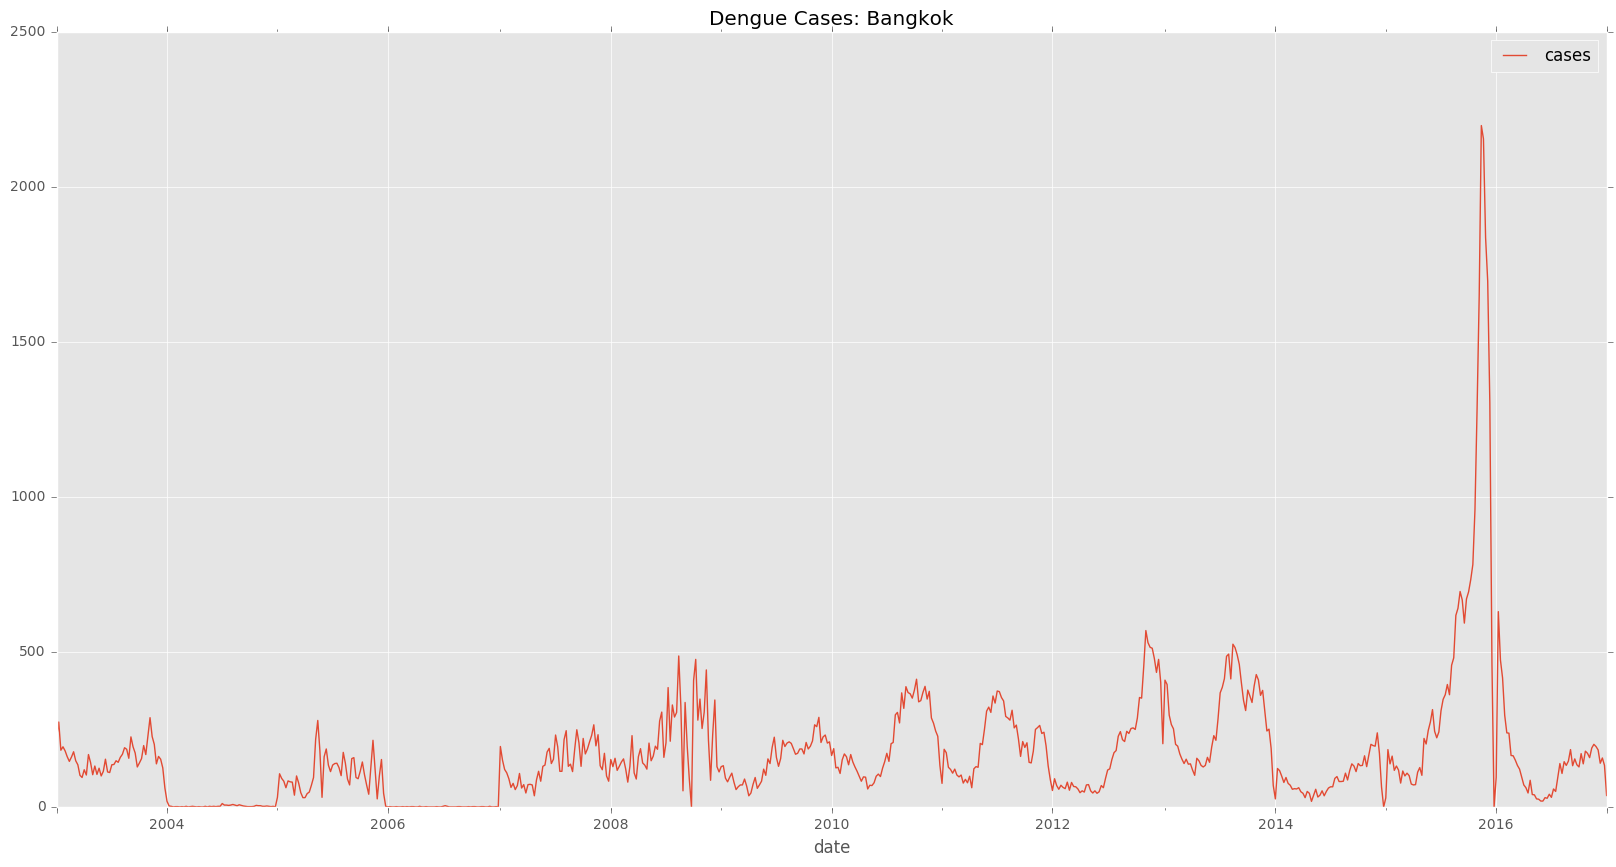

In [305]:
bkk_dengues_df['year'] = bkk_dengues_df.index.astype('str').str[:4]
bkk_dengues_df['month'] = bkk_dengues_df.index.astype('str').str[5:7]
# from 2007 onward
# bkk_dengues_df = bkk_dengues_df[209:]
bkk_dengues_df.freq.plot(figsize=(20,10),label='cases')
plt.title("Dengue Cases: Bangkok")
plt.legend()

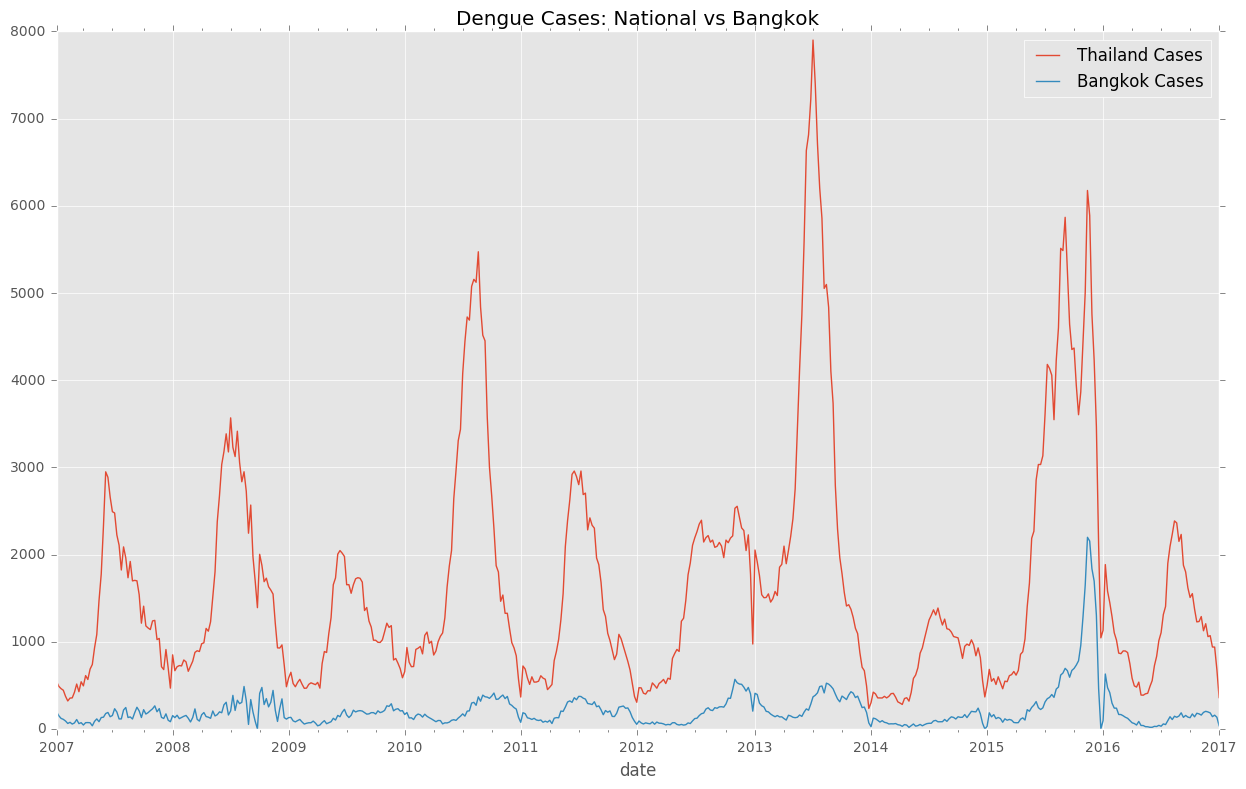

In [306]:
weekly_df.cases.plot(figsize=(15,9),label='Thailand Cases')
bkk_dengues_df.freq[209:].plot(label='Bangkok Cases')
plt.title('Dengue Cases: National vs Bangkok')
plt.legend()

In [167]:
bkk_dengues_df.tail

<bound method DataFrame.tail of             freq  year month
date                        
2003-01-05   224  2003    01
2003-01-12   274  2003    01
2003-01-19   183  2003    01
2003-01-26   194  2003    01
2003-02-02   181  2003    02
2003-02-09   162  2003    02
2003-02-16   147  2003    02
2003-02-23   161  2003    02
2003-03-02   178  2003    03
2003-03-09   149  2003    03
2003-03-16   136  2003    03
2003-03-23   102  2003    03
2003-03-30    95  2003    03
2003-04-06   120  2003    04
2003-04-13   103  2003    04
2003-04-20   169  2003    04
2003-04-27   143  2003    04
2003-05-04   104  2003    05
2003-05-11   132  2003    05
2003-05-18   105  2003    05
2003-05-25   125  2003    05
2003-06-01   100  2003    06
2003-06-08   115  2003    06
2003-06-15   154  2003    06
2003-06-22   113  2003    06
2003-06-29   111  2003    06
2003-07-06   136  2003    07
2003-07-13   137  2003    07
2003-07-20   149  2003    07
2003-07-27   144  2003    07
...          ...   ...   ...
2015-10-25 

In [314]:
# date_df.to_csv("all-dengues.csv")

# weather data starts below

In [72]:
temperature = glob.glob("met18000/yr2001-2012/*.xls")

list_ = []
for file_ in temperature:
    df = pd.read_excel(file_)
    list_.append(df)
    allTemps = np.concatenate(list_)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [73]:
#'stn_name', 'stn_code', 'year', 'month', 'dday', 'maxtemp', 'mintemp', 'rain', 'avgrh', 'meantemp'
temp_df = pd.DataFrame(allTemps)

In [74]:
temp_df.columns = ['stn_name', 'stn_code', 'year', 'month', 'dday', 'maxtemp', 'mintemp', 'rain', 'avgrh', 'meantemp']

In [75]:
def clean_stn_name(name):
    if '\t' in name:
        return name.split('\t')[1]
    else:
        return name

In [76]:
temp_df['stn_name'] = temp_df['stn_name'].apply(clean_stn_name)

In [77]:
np.unique(np.array(temp_df['stn_name']))

array([u'Ayuttaya Agromet', u'Bangkok Metropolis*', u'Burirum*',
       u'Chacherngsao Agromet', u'Chai Nat*', u'Chaiyaphum*',
       u'Chiang Mai', u'Chiang Rai*', u'Chon Buri*', u'Kamalasai',
       u'Kamphaeng Phet*', u'Kamphaeng Saen Agromet', u'Kanchanaburi*',
       u'Khlong Yai*', u'Kho Hong Agromet', u'Kosum Phisai*', u'Krabi*',
       u'Lampang*', u'Lamphun*', u'Loei Agromet', u'Lop Buri*',
       u'Mae Hong Son*', u'Mukdahan*', u'Nakhon Phanom*',
       u'Nakhon Ratchasima*', u'Nakhon Sawan*', u'Nakhon Si Thammarat*',
       u'Nan*', u'Narathiwat*', u'Nong Khai*', u'Pathumthani Agromet',
       u'Pattani Airport*', u'Phatthalung Agromet', u'Phayao*',
       u'Phetchabun*', u'Phetchaburi*', u'Phitsanulok*', u'Phrae*',
       u'Phriu Agromet', u'Phuket*', u'Pichit Agromet', u'Pilot Station*',
       u'Prachin Buri*', u'Prachuap Khiri Khan*', u'Ranong*',
       u'Ratchaburi', u'Rayong*', u'Roi Et*', u'Sa Kaew',
       u'Sakon Nakhon Agromet', u'Satun*', u'Sawi Agromet',
       u

In [78]:
# temp_df[temp_df['stn_name'] == 'Bangkok Metropolis*']

def clean_date(date):
    if len(str(date)) == 1:
        return "0" + str(date)
    else:
        return str(date)

temp_df['month'] = temp_df['month'].apply(clean_date)
temp_df['dday'] = temp_df['dday'].apply(clean_date)

temp_df['date'] = temp_df['year'].astype('str') + "-" + \
                  temp_df['month'].astype('str') + "-" + \
                  temp_df['dday'].astype('str')



In [79]:
temp_df['date'] = pd.DatetimeIndex(temp_df.date)
temp_df = temp_df.set_index('date')

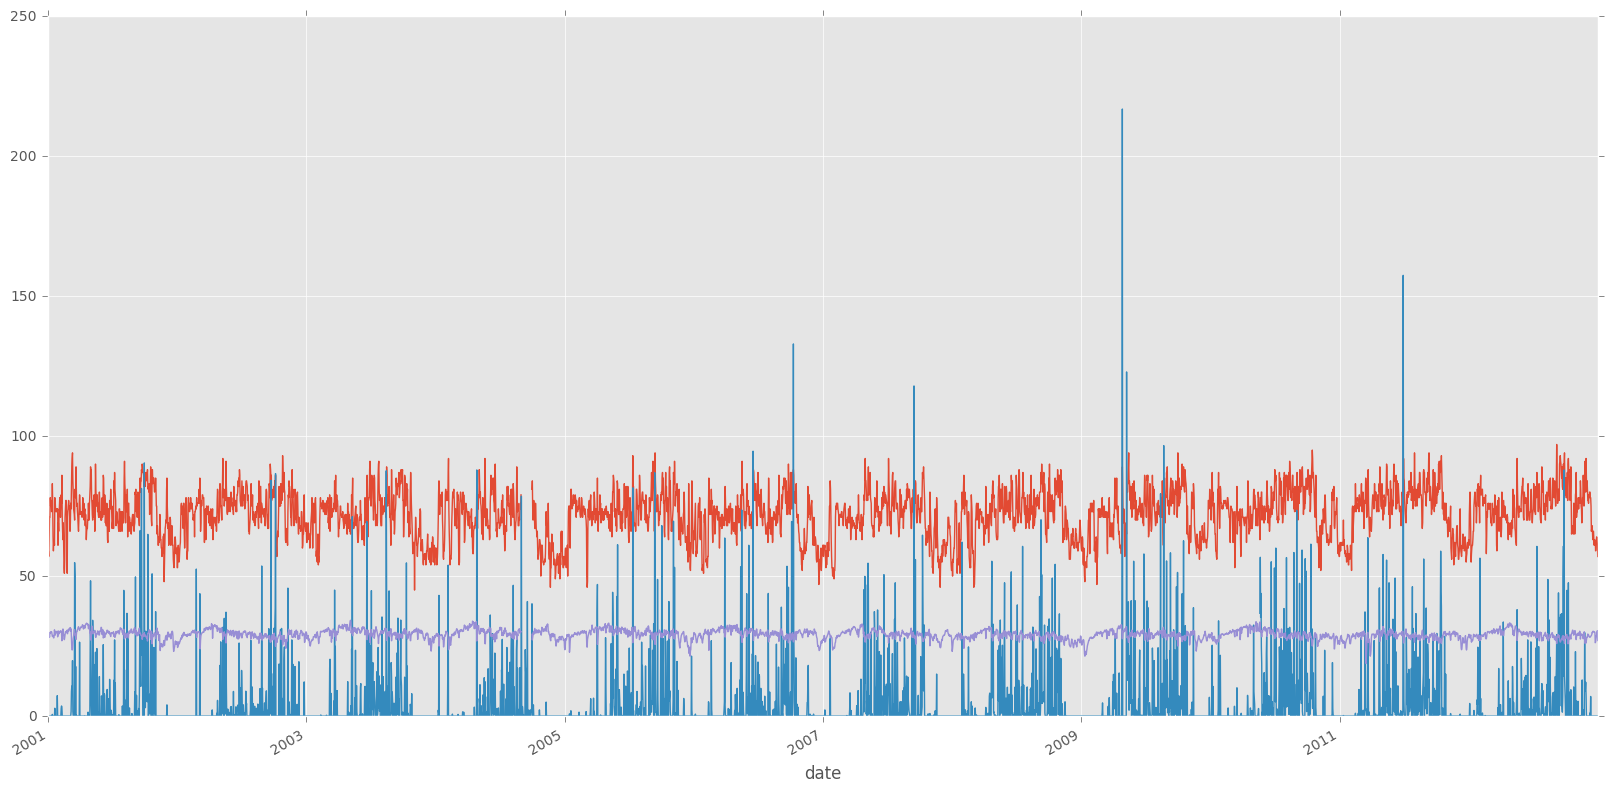

In [80]:
bkk_temperature = temp_df[temp_df['stn_name'] == 'Bangkok Metropolis*']
bkk_temperature['avgrh'].plot(figsize=(20,10))
bkk_temperature['rain'].plot()
bkk_temperature['meantemp'].plot()

In [81]:
bkk_weekly = bkk_temperature.resample('w')

In [82]:
bkk_weekly = pd.DataFrame(bkk_temperature[['rain', 'avgrh', 'meantemp']], dtype='f')
bkk_weekly = bkk_weekly.fillna(0)
bkk_weekly = bkk_weekly.resample('W').mean()

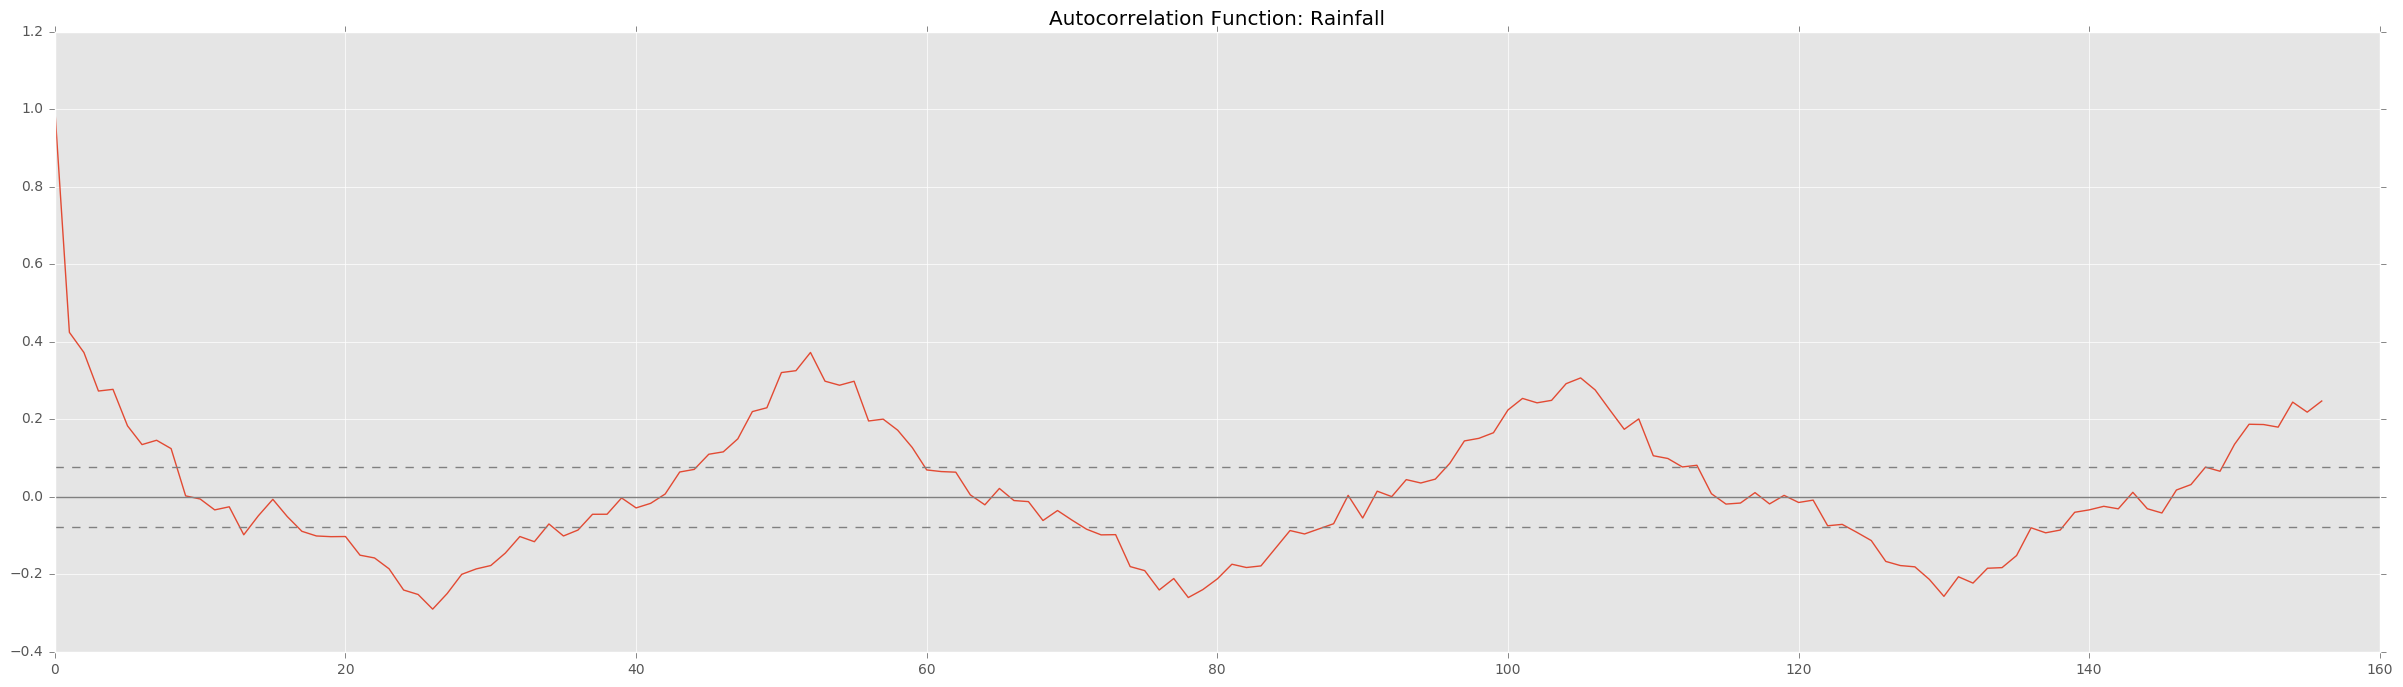

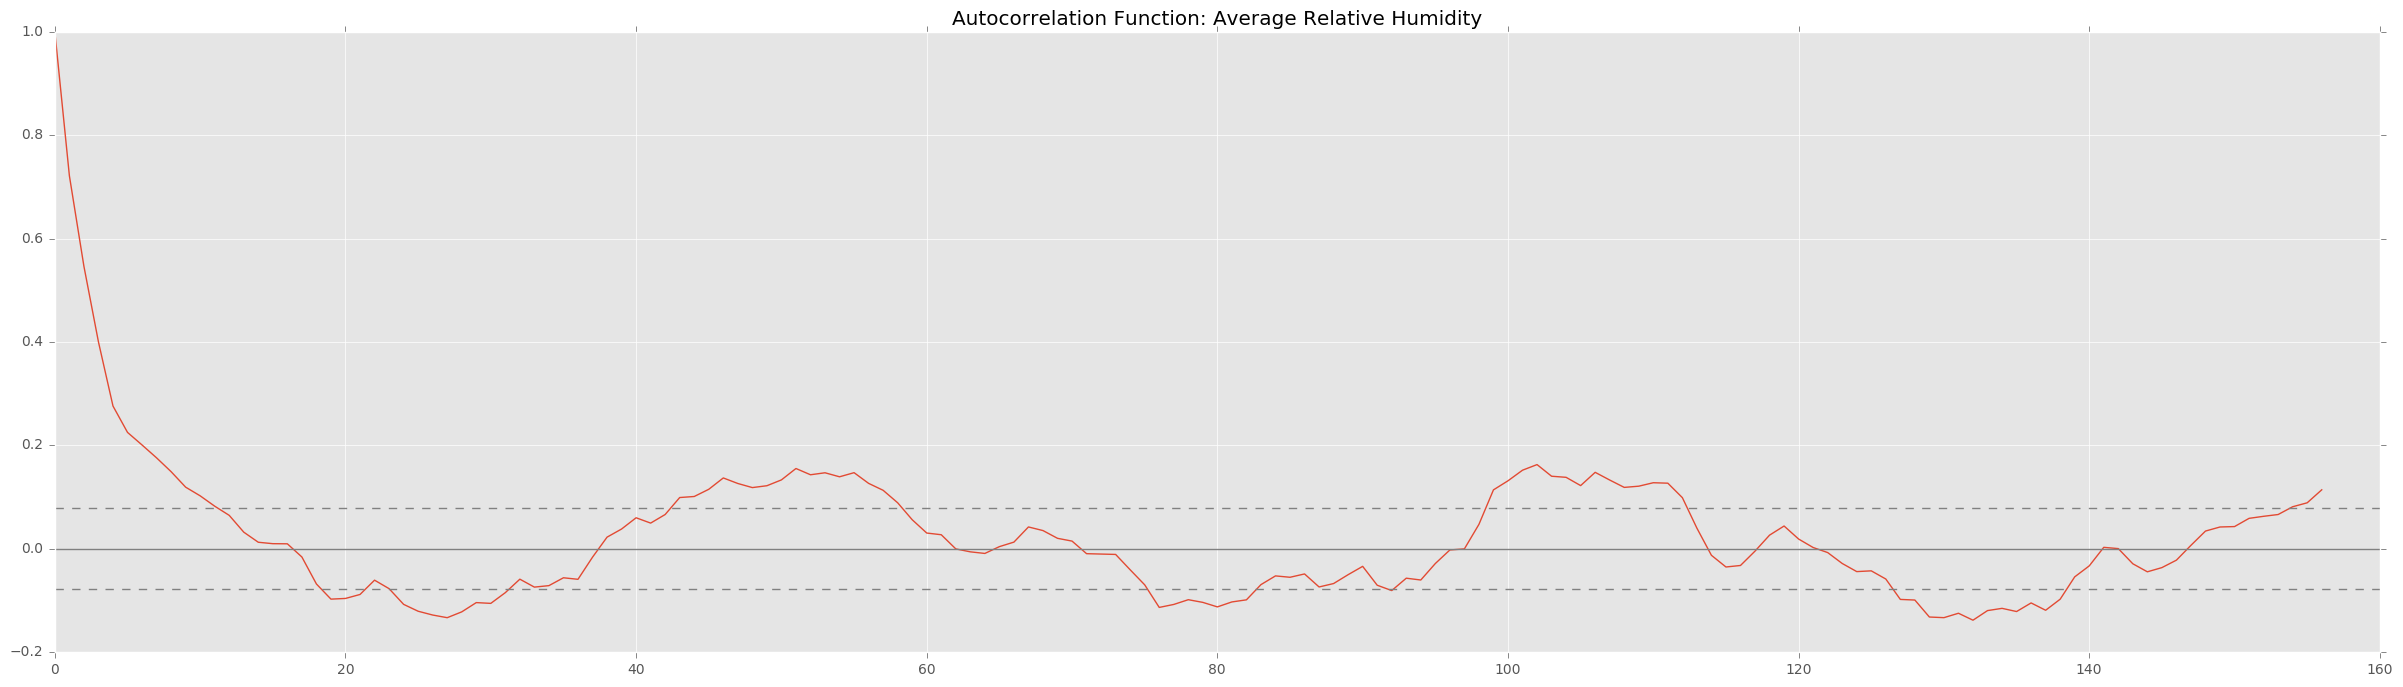

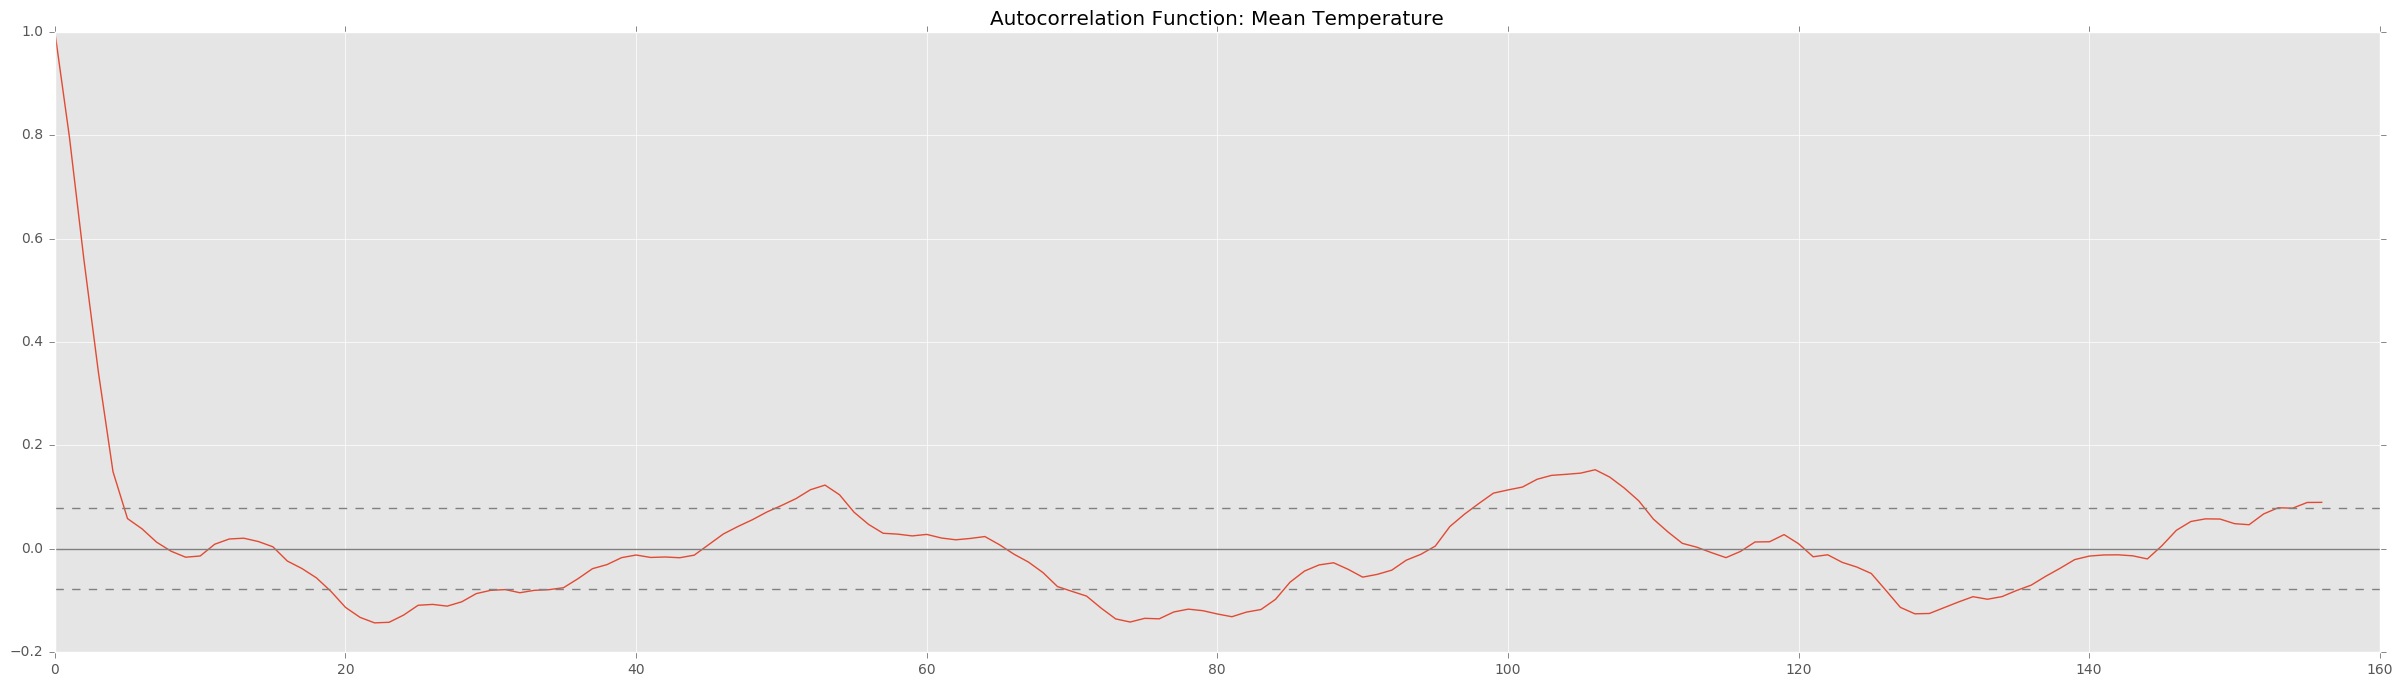

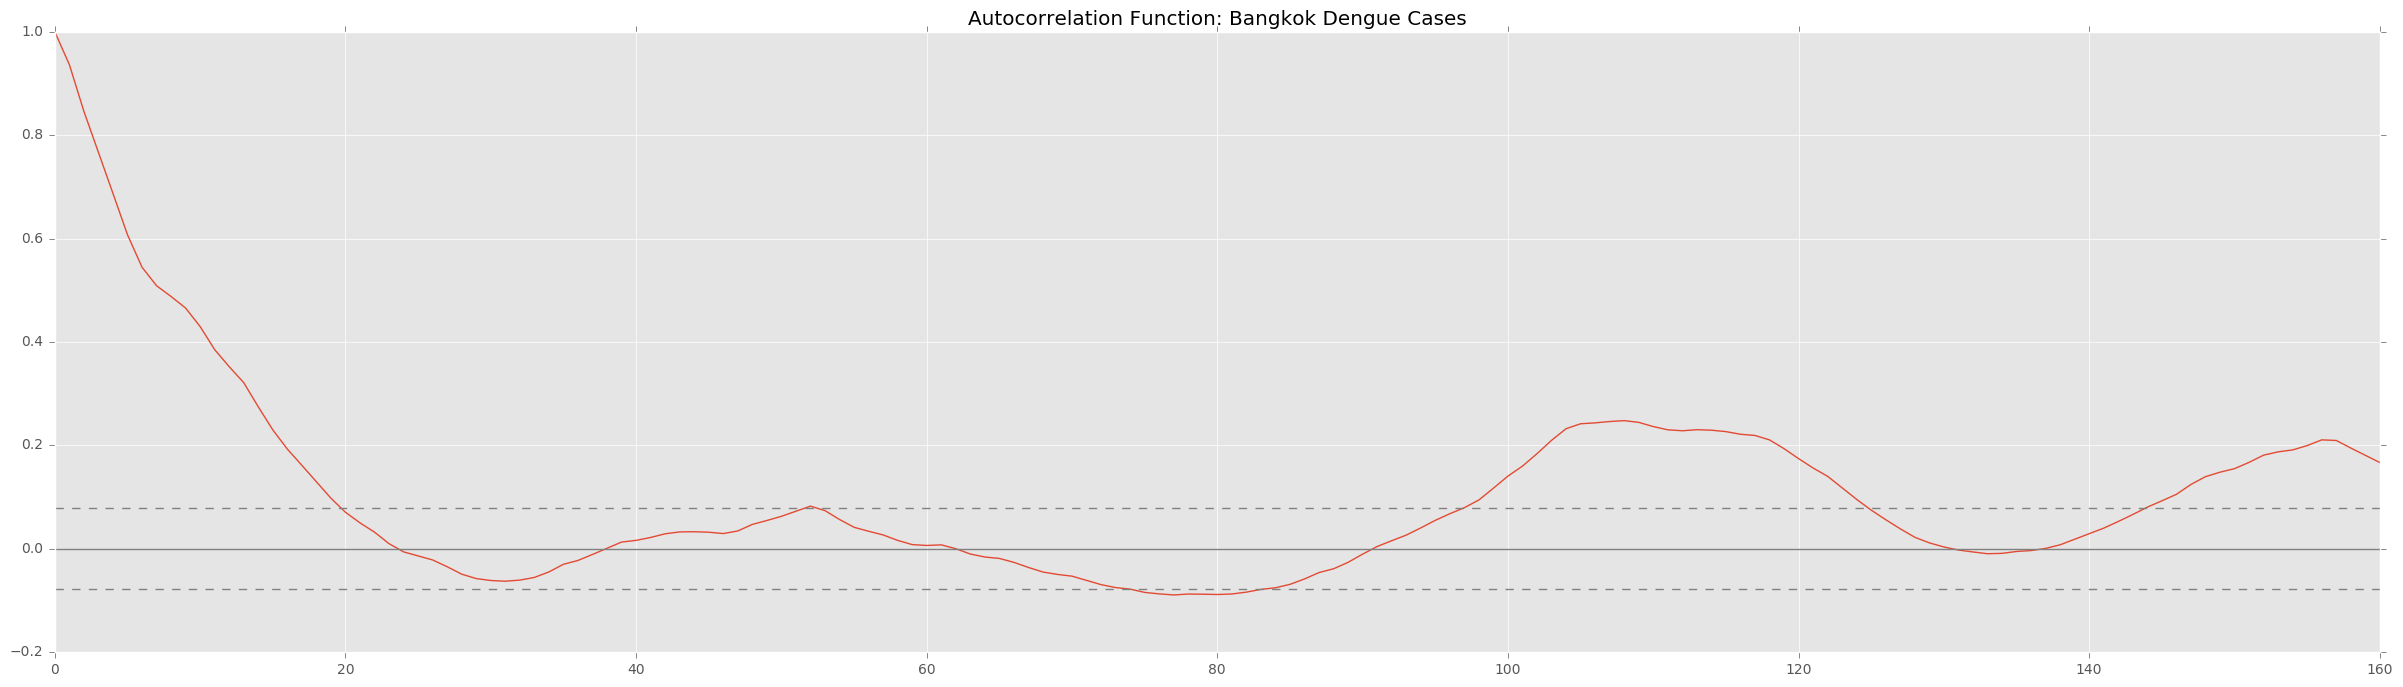

In [83]:
rain_acf = acf(bkk_weekly['rain'],nlags=len(bkk_weekly)/4)
avgrh_acf = acf(bkk_weekly['avgrh'],nlags=len(bkk_weekly)/4)
mean_temp_acf = acf(bkk_weekly['meantemp'],nlags=len(bkk_weekly)/4)
lag_acf = acf(bkk_dengues_df['freq'],nlags=160)

plt.figure(figsize=(30,8))
plt.plot(rain_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function: Rainfall')

plt.figure(figsize=(30,8))
plt.plot(avgrh_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function: Average Relative Humidity')

plt.figure(figsize=(30,8))
plt.plot(mean_temp_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function: Mean Temperature')

plt.figure(figsize=(30,8))
plt.plot(lag_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function: Bangkok Dengue Cases')

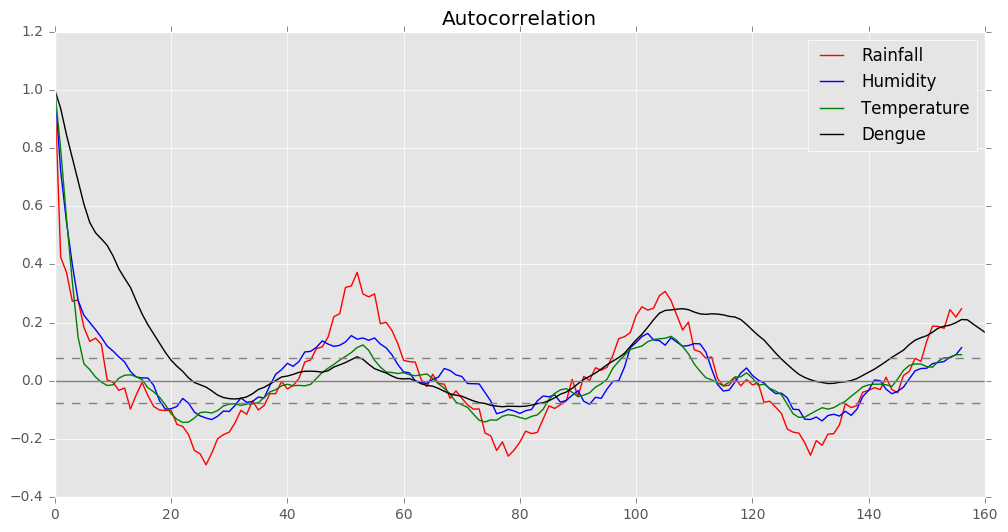

In [84]:
plt.figure(figsize=(12,6))
plt.plot(rain_acf,'-r',label='Rainfall')
plt.plot(avgrh_acf,'-b',label='Humidity')
plt.plot(mean_temp_acf,'-g',label='Temperature')
plt.plot(lag_acf,'-k',label='Dengue')
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.legend()
plt.title('Autocorrelation')

In [85]:
# correlation between time series